In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("ecommerce_customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df = df.drop(["Email", "Address", "Avatar"], axis=1)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
scaler = StandardScaler()

features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
df[features] = scaler.fit_transform(df[features])

In [5]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.456351,0.607280,2.493589,0.550107,587.951054
1,-1.136502,-0.949464,0.206556,-0.870927,392.204933
2,-0.052723,-0.727139,0.049681,0.572067,487.547505
3,1.263010,1.676390,-0.335978,-0.413996,581.852344
4,0.279838,0.747770,0.471737,0.914422,599.406092


In [6]:
df.corr()   

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [7]:
def cost_mse(X, y, w):
    m = len(y)
    y_hat = X.dot(w)
    j = (1 / (2 * m)) * np.sum(np.square(y_hat - y))
    return j

In [8]:
class LinearRegression():
    def __init__(self, lr, num_iterations):
        self.w = None
        self.lr = lr
        self.num_iterations = num_iterations
        self.costs_list = []

    def add_bias(self, X):
        X_with_bais = np.c_[X, np.ones(X.shape[0])]
        return X_with_bais

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.w = np.zeros(self.X_train.shape[1])
        self.w, self.costs_list = self.gradient_decent(self.X_train, self.y_train, self.w)
        return self.w, self.costs_list
    
    def predict(self, X):
        return X.dot(self.w)
    
    def gradient_decent(self, X, y, w):
        costs = []
        m = len(y)
        for i in range(self.num_iterations):
            y_hat = X.dot(w)
            error = y_hat - y
            w = w - (self.lr / m) * error.dot(X).T
            costs.append(cost_mse(X, y, w))
        return w, costs

In [9]:
X_single = df['Length of Membership']
y_single = df['Yearly Amount Spent']

In [10]:
lin_reg_single = LinearRegression(0.005, 10000)
X_single = lin_reg_single.add_bias(X_single)
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)
single_train_costs = []
w_single, single_train_costs = lin_reg_single.fit(X_single_train, y_single_train)
w_single

array([ 64.52877261, 499.75542343])

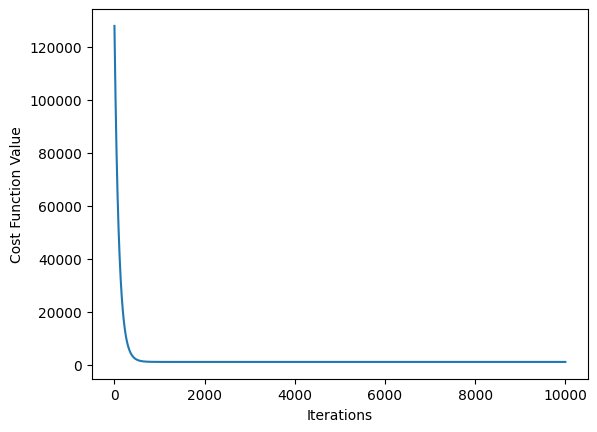

In [11]:
plt.plot(range(lin_reg_single.num_iterations), single_train_costs)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.show()

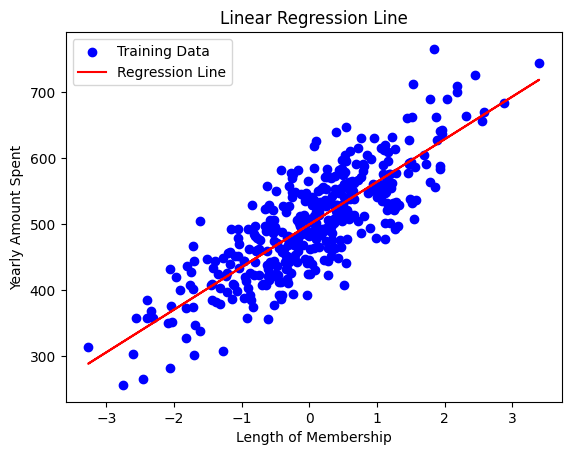

In [12]:
plt.scatter(X_single_train[:, 0], y_single_train, color='blue', label='Training Data')

y_pred_train_single = lin_reg_single.predict(X_single_train)
y_pred_test_single = lin_reg_single.predict(X_single_test)

plt.plot(X_single_train[:, 0], y_pred_train_single, color='red', label='Regression Line')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Linear Regression Line')
plt.legend()
plt.show()

In [13]:
X_double = df[['Time on App', 'Length of Membership']]
y_double = df['Yearly Amount Spent']

In [14]:
lin_reg_double = LinearRegression(0.05, 10000)
X_double = lin_reg_double.add_bias(X_double)
X_double_train, X_double_test, y_double_train, y_double_test = train_test_split(X_double, y_double, test_size=0.2, random_state=42)
double_train_costs = []
w_double, double_train_costs = lin_reg_double.fit(X_double_train, y_double_train)
w_double

array([ 37.79433711,  62.6378128 , 499.62201624])

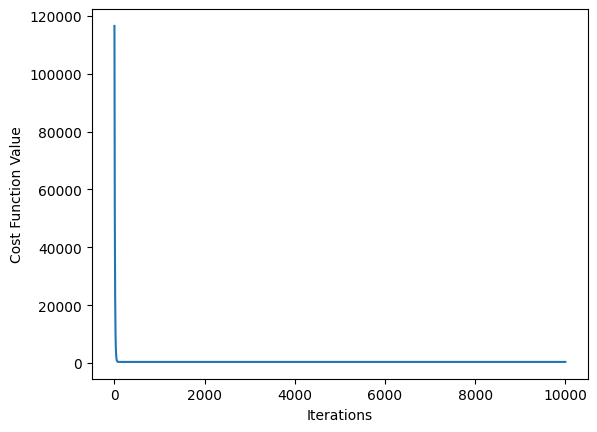

In [15]:
plt.plot(range(lin_reg_double.num_iterations), double_train_costs)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.show()

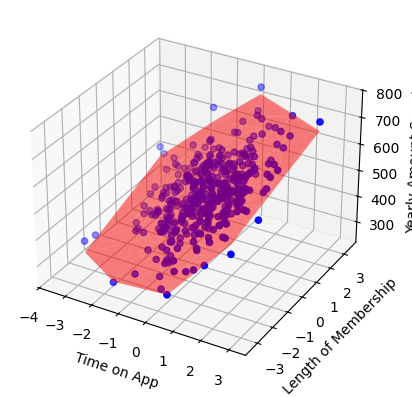

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_double_train[:, 0], X_double_train[:, 1], y_double_train, color='blue')

y_pred_train_double = lin_reg_double.predict(X_double_train)
y_pred_test_double = lin_reg_double.predict(X_double_test)

ax.plot_trisurf(X_double_train[:, 0], X_double_train[:, 1], y_pred_train_double, color='red', alpha=0.5)
ax.set_xlabel('Time on App')
ax.set_ylabel('Length of Membership')
ax.set_zlabel('Yearly Amount Spent')
plt.show()

In [17]:
mse_train_single = mean_squared_error(y_single_train, y_pred_train_single)
mse_test_single = mean_squared_error(y_single_test, y_pred_test_single)

mse_train_double = mean_squared_error(y_double_train, y_pred_train_double)
mse_test_double = mean_squared_error(y_double_test, y_pred_test_double)

print('Single Feature (Length of Membership) - Training Mean Squared Error:', mse_train_single)
print('Single Feature (Length of Membership) - Test Mean Squared Error:', mse_test_single)

print('Double Features (Length of Membership, Time on App) - Training Mean Squared Error:', mse_train_double)
print('Double Features (Length of Membership, Time on App) - Test Mean Squared Error:', mse_test_double)

Single Feature (Length of Membership) - Training Mean Squared Error: 2170.4452397105183
Single Feature (Length of Membership) - Test Mean Squared Error: 2162.1116327764053
Double Features (Length of Membership, Time on App) - Training Mean Squared Error: 732.3539569067729
Double Features (Length of Membership, Time on App) - Test Mean Squared Error: 802.7465964832029


In [18]:
# sample_data_single = np.array([4])
sample_data_single = np.array([0.550107])
sample_data_single = lin_reg_single.add_bias(sample_data_single)

# sample_data_single = np.array([12, 4])
sample_data_double = np.array([[0.607280, 0.550107]])
sample_data_double = lin_reg_double.add_bias(sample_data_double)

predictions_single = lin_reg_single.predict(sample_data_single)
predictions_double = lin_reg_double.predict(sample_data_double)

print('Single Feature Predictions:', predictions_single)
print('double Features Predictions:', predictions_double)

Single Feature Predictions: [535.25315295]
double Features Predictions: [557.03126056]
